In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats
# Label of DOG is 1 and Label of cat is 0

##Image_Classification_CNN_of_Dogs&Cats

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 120MB/s]
100% 1.06G/1.06G [00:08<00:00, 140MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16

In [5]:
# Generators (Divide the data into batches, so a batch load in RAM)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize. This function process normalizes the pixel values of images to the range [0, 1]
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 1.2266 - accuracy: 0.5578 - val_loss: 0.7245 - val_accuracy: 0.5590
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.6426 - accuracy: 0.6360 - val_loss: 0.6863 - val_accuracy: 0.5788
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5406 - accuracy: 0.7243 - val_loss: 0.5168 - val_accuracy: 0.7498
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4783 - accuracy: 0.7688 - val_loss: 0.4704 - val_accuracy: 0.7850
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4078 - accuracy: 0.8142 - val_loss: 0.5050 - val_accuracy: 0.7672
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3395 - accuracy: 0.8526 - val_loss: 0.5132 - val_accuracy: 0.7616
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2537 - accuracy: 0.8940 - val_loss: 0.5558 - val_ac

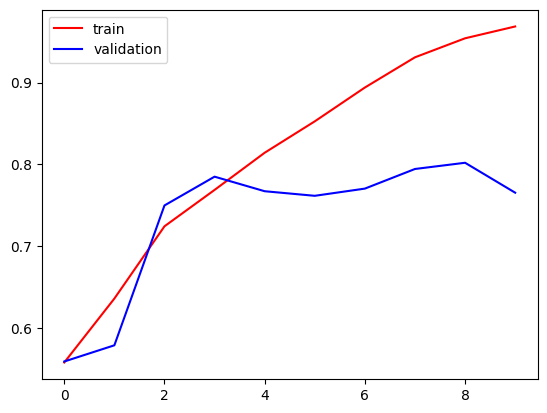

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

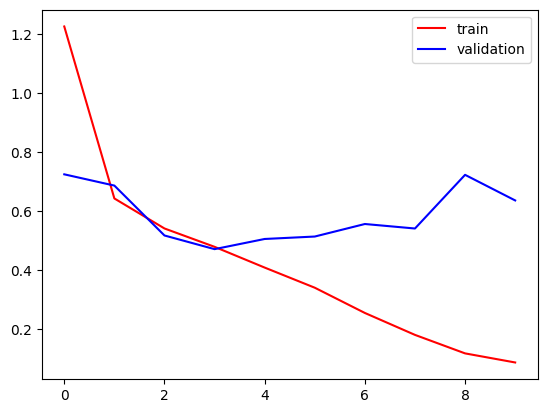

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

DOG IMAGE TEST

In [13]:
# Download the image from GitHub
!wget https://github.com/SayakKDutta/Image_Classification_CNN/blob/main/DATASET/TEST/dog.jpg?raw=true

--2024-05-04 08:16:31--  https://github.com/SayakKDutta/Image_Classification_CNN/blob/main/DATASET/TEST/dog.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SayakKDutta/Image_Classification_CNN/raw/main/DATASET/TEST/dog.jpg [following]
--2024-05-04 08:16:32--  https://github.com/SayakKDutta/Image_Classification_CNN/raw/main/DATASET/TEST/dog.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SayakKDutta/Image_Classification_CNN/main/DATASET/TEST/dog.jpg [following]
--2024-05-04 08:16:32--  https://raw.githubusercontent.com/SayakKDutta/Image_Classification_CNN/main/DATASET/TEST/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserco

In [14]:
import cv2

In [15]:
test_img = cv2.imread('/content/dog.jpg?raw=true')

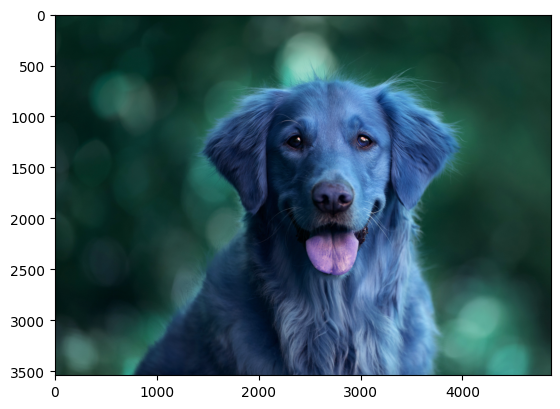

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(3541, 4869, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256)) #resize

In [19]:
test_input = test_img.reshape((1,256,256,3)) #Batches (4d tensor) [one image with dimension 256,256,3]

In [20]:
model.predict(test_input) #dog assigned 1, cat assigned 0

1/1 [==============================] - 0s 384ms/step


array([[1.]], dtype=float32)

CAT IMAGE TEST

In [21]:
!wget https://github.com/SayakKDutta/Image_Classification_CNN/blob/main/DATASET/TEST/cat.jpg?raw=true -O cat.jpg

--2024-05-04 08:16:37--  https://github.com/SayakKDutta/Image_Classification_CNN/blob/main/DATASET/TEST/cat.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SayakKDutta/Image_Classification_CNN/raw/main/DATASET/TEST/cat.jpg [following]
--2024-05-04 08:16:37--  https://github.com/SayakKDutta/Image_Classification_CNN/raw/main/DATASET/TEST/cat.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SayakKDutta/Image_Classification_CNN/main/DATASET/TEST/cat.jpg [following]
--2024-05-04 08:16:37--  https://raw.githubusercontent.com/SayakKDutta/Image_Classification_CNN/main/DATASET/TEST/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserco

In [22]:
test_img1 = cv2.imread('/content/cat.jpg')

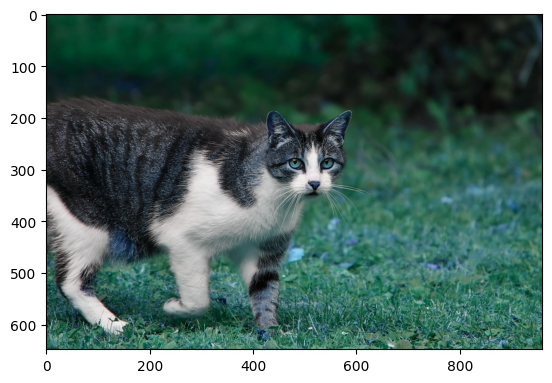

In [23]:
plt.imshow(test_img1)

In [24]:
test_img1.shape

(648, 960, 3)

In [25]:
test_img1 = cv2.resize(test_img1,(256,256)) #resize

In [26]:
test_input1 = test_img1.reshape((1,256,256,3))

In [27]:
model.predict(test_input1)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

##Using Transfer Learning

In [28]:
conv_base = VGG16(
    weights ='imagenet',
    include_top = False, #ignoringdenselayers
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
new_model = Sequential()

new_model.add(conv_base)
new_model.add(Flatten())
new_model.add(Dense(256,activation='relu'))
new_model.add(Dense(1,activation='sigmoid'))

In [31]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
conv_base.trainable = False #dont retrain its weight

In [33]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [34]:
# generators
new_train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

new_validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [35]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

new_train_ds = new_train_ds.map(process)
new_validation_ds = new_validation_ds.map(process)

In [36]:
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
new_history = new_model.fit(new_train_ds,epochs=10,validation_data=new_validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 85ms/step - loss: 0.2715 - accuracy: 0.8816 - val_loss: 0.2041 - val_accuracy: 0.9098
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1930 - accuracy: 0.9194 - val_loss: 0.1979 - val_accuracy: 0.9168
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1553 - accuracy: 0.9359 - val_loss: 0.2079 - val_accuracy: 0.9140
Epoch 4/10
625/625 [==============================] - 51s 82ms/step - loss: 0.1228 - accuracy: 0.9504 - val_loss: 0.2485 - val_accuracy: 0.9076
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1036 - accuracy: 0.9588 - val_loss: 0.2491 - val_accuracy: 0.9090
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0763 - accuracy: 0.9718 - val_loss: 0.3106 - val_accuracy: 0.9046
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0527 - accuracy: 0.9813 - val_loss: 0.2747 - val_accuracy:

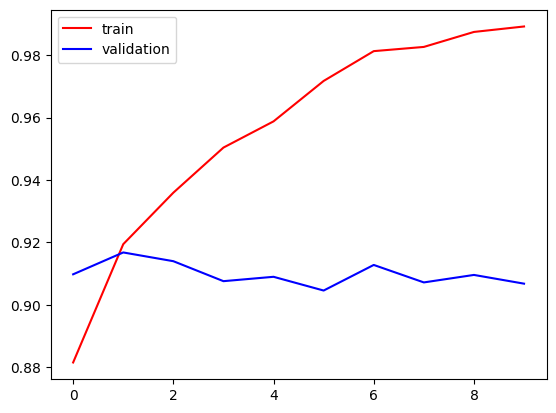

In [38]:
import matplotlib.pyplot as plt

plt.plot(new_history.history['accuracy'],color='red',label='train')
plt.plot(new_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

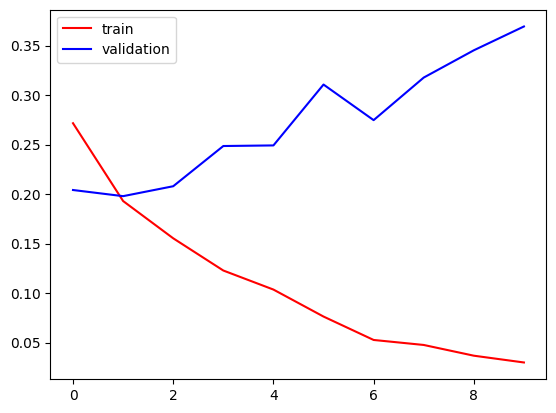

In [39]:
plt.plot(new_history.history['loss'],color='red',label='train')
plt.plot(new_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

TRANSFER LEARNING TEST

CAT

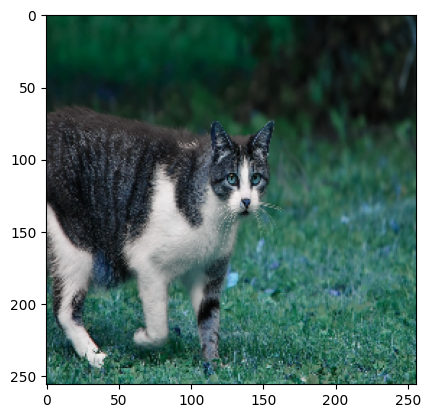

In [40]:
plt.imshow(test_img1)

In [41]:
test_img1.shape

(256, 256, 3)

In [42]:
test_img1 = cv2.resize(test_img1,(150,150))

In [43]:
test_input1 = test_img1.reshape((1,150,150,3))

In [44]:
new_model.predict(test_input1)

1/1 [==============================] - 1s 991ms/step


array([[1.]], dtype=float32)

My Own Pet (CAT)

In [45]:
!wget https://github.com/SayakKDutta/Image_Classification_CNN/blob/main/DATASET/TEST/myhousecat.jpg?raw=true

--2024-05-04 08:28:21--  https://github.com/SayakKDutta/Image_Classification_CNN/blob/main/DATASET/TEST/myhousecat.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SayakKDutta/Image_Classification_CNN/raw/main/DATASET/TEST/myhousecat.jpg [following]
--2024-05-04 08:28:21--  https://github.com/SayakKDutta/Image_Classification_CNN/raw/main/DATASET/TEST/myhousecat.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SayakKDutta/Image_Classification_CNN/main/DATASET/TEST/myhousecat.jpg [following]
--2024-05-04 08:28:21--  https://raw.githubusercontent.com/SayakKDutta/Image_Classification_CNN/main/DATASET/TEST/myhousecat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133,

In [46]:
test_img_pet = cv2.imread('/content/myhousecat.jpg?raw=true')

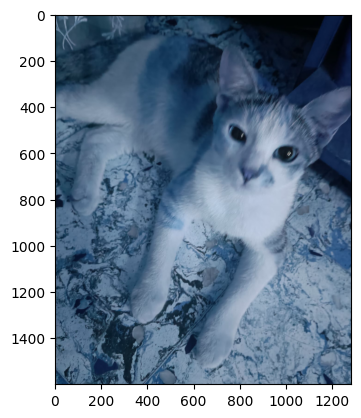

In [47]:
plt.imshow(test_img_pet)

In [48]:
test_img_pet.shape

(1600, 1283, 3)

In [49]:
test_imgpet = cv2.resize(test_img_pet,(150,150))

In [50]:
test_inputpet = test_imgpet.reshape((1,150,150,3))

In [51]:
new_model.predict(test_inputpet)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

DOG

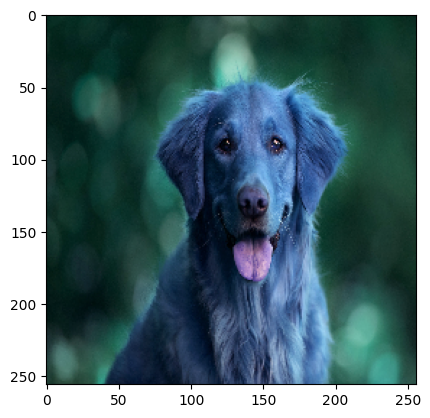

In [52]:
plt.imshow(test_img)

In [53]:
test_img = cv2.resize(test_img,(150,150))

In [54]:
test_input = test_img.reshape((1,150,150,3))

In [55]:
new_model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

##Using Data Augmentation to treat Overfitting

In [56]:
from keras.preprocessing.image import ImageDataGenerator

In [57]:
import os
import shutil

# Define paths
test_dir = "/content/test"

# Create directories for test and validation
test_dest = "/content/test_data"
valid_dest = "/content/valid_data"
os.makedirs(test_dest, exist_ok=True)
os.makedirs(valid_dest, exist_ok=True)

# Define the ratio of test data to validation data (e.g., 80% test, 20% validation)
split_ratio = 0.8

# Iterate over each class directory in the test directory
for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    if os.path.isdir(class_dir):
        class_images = os.listdir(class_dir)
        num_class_images = len(class_images)
        num_test_class_images = int(num_class_images * split_ratio)

        # Create subdirectories for test and validation data
        test_class_dest = os.path.join(test_dest, class_name)
        valid_class_dest = os.path.join(valid_dest, class_name)
        os.makedirs(test_class_dest, exist_ok=True)
        os.makedirs(valid_class_dest, exist_ok=True)

        # Copy test images to test_data directory
        for img_name in class_images[:num_test_class_images]:
            img_path = os.path.join(class_dir, img_name)
            shutil.copy(img_path, test_class_dest)

        # Copy remaining images to valid_data directory
        for img_name in class_images[num_test_class_images:]:
            img_path = os.path.join(class_dir, img_name)
            shutil.copy(img_path, valid_class_dest)

print("Test data:")
for class_name in os.listdir(test_dest):
    class_dir = os.path.join(test_dest, class_name)
    if os.path.isdir(class_dir):
        print(class_name, len(os.listdir(class_dir)))

print("Validation data:")
for class_name in os.listdir(valid_dest):
    class_dir = os.path.join(valid_dest, class_name)
    if os.path.isdir(class_dir):
        print(class_name, len(os.listdir(class_dir)))


Test data:
cats 2000
dogs 2000
Validation data:
cats 500
dogs 500


In [58]:
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255) #only rescaling

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/valid_data',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [59]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [60]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [61]:
aug_history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/50


<ipython-input-61-604528d35d77>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  aug_history = model.fit_generator(


125/125 [==============================] - 19s 131ms/step - loss: 0.6953 - accuracy: 0.5175 - val_loss: 0.6782 - val_accuracy: 0.6100
Epoch 2/50
125/125 [==============================] - 16s 128ms/step - loss: 0.6797 - accuracy: 0.5770 - val_loss: 0.6548 - val_accuracy: 0.6100
Epoch 3/50
125/125 [==============================] - 16s 128ms/step - loss: 0.6609 - accuracy: 0.6010 - val_loss: 0.6217 - val_accuracy: 0.6525
Epoch 4/50
125/125 [==============================] - 16s 129ms/step - loss: 0.6466 - accuracy: 0.6320 - val_loss: 0.6220 - val_accuracy: 0.6450
Epoch 5/50
125/125 [==============================] - 15s 119ms/step - loss: 0.6303 - accuracy: 0.6595 - val_loss: 0.5713 - val_accuracy: 0.7250
Epoch 6/50
125/125 [==============================] - 17s 132ms/step - loss: 0.6366 - accuracy: 0.6455 - val_loss: 0.6567 - val_accuracy: 0.6862
Epoch 7/50
125/125 [==============================] - 16s 129ms/step - loss: 0.6231 - accuracy: 0.6680 - val_loss: 0.5573 - val_accuracy: 0.7

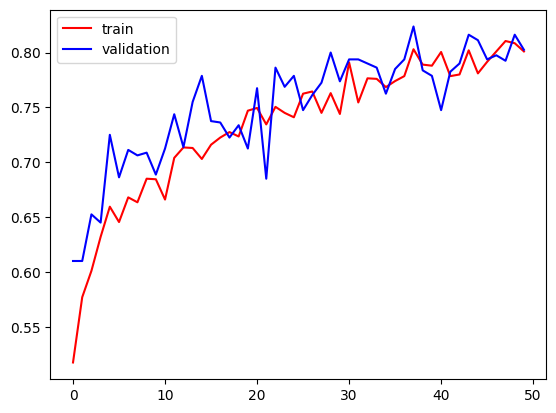

In [62]:
import matplotlib.pyplot as plt

plt.plot(aug_history.history['accuracy'],color='red',label='train')
plt.plot(aug_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

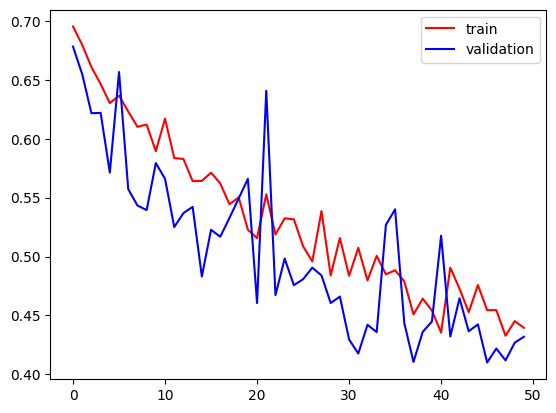

In [63]:
plt.plot(aug_history.history['loss'],color='red',label='train')
plt.plot(aug_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Training and Validation loss follows each other

TEST

In [68]:
model.predict(test_input1) #/content/cat.jpg

1/1 [==============================] - 0s 50ms/step


array([[0.]], dtype=float32)

In [65]:
model.predict(test_input) #/content/dog.jpg?raw=true

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)